<a href="https://colab.research.google.com/github/alphaczar/Deep-Learning/blob/master/EmergencyVsNonEmergency_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [9]:
#tfms= get_transforms(do_flip=True,flip_vert=True,max_rotate=50,max_lighting=0.1,max_warp=0 )

In [4]:
path = '/content/drive/My Drive/EmergencyNonEmergency'
data = ImageDataBunch.from_folder(path, train='train_images', test='test_images',seed =1,valid_pct=0.2)

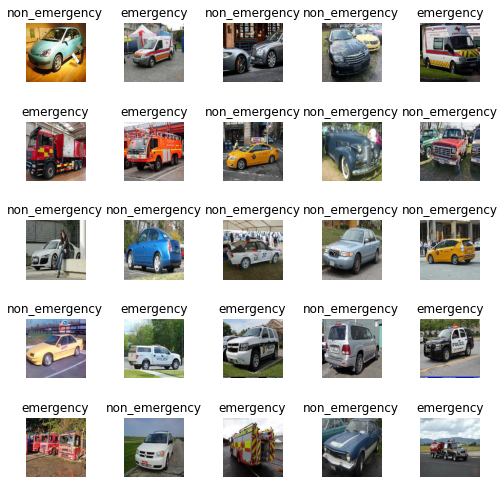

In [5]:
data.show_batch(row=3, figsize=(7, 7))

In [6]:
print(data.classes)
len(data.classes), data.c

['emergency', 'non_emergency']


(2, 2)

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [8]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.598831,0.276169,0.069909,09:50
1,0.391601,0.282763,0.075988,00:17
2,0.264191,0.234519,0.066869,00:10
3,0.190439,0.233265,0.063830,00:10


In [10]:
learn.save('stage-1')

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

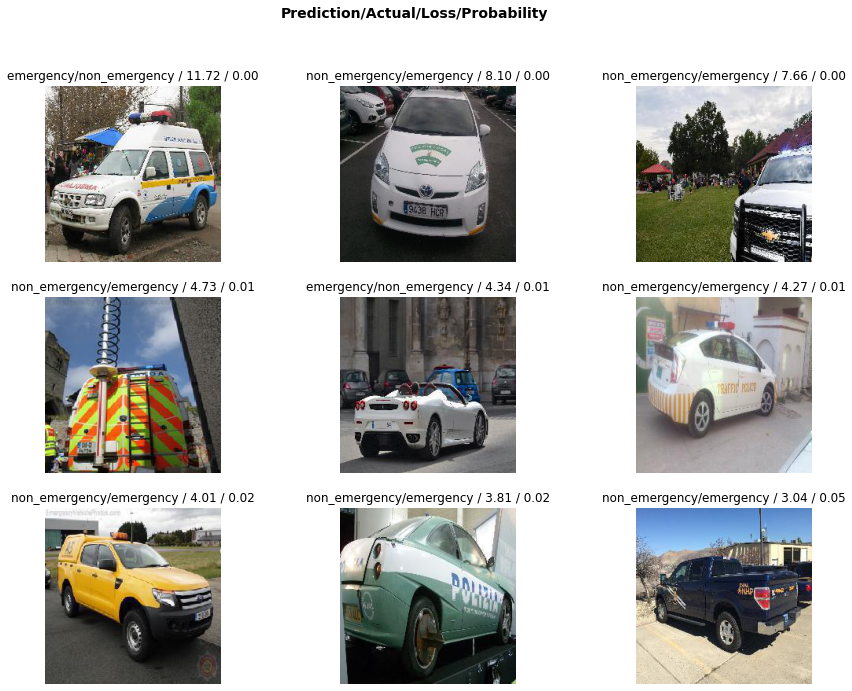

In [12]:
interp.plot_top_losses(9, figsize=(15,11))

In [13]:
#doc(interp.plot_top_losses)

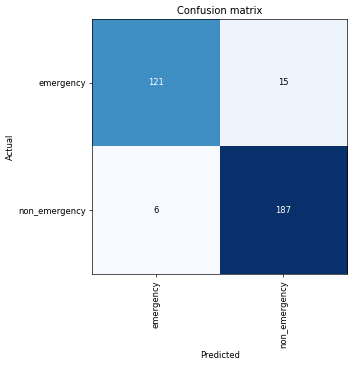

In [14]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [15]:
interp.most_confused(min_val=2)

[('emergency', 'non_emergency', 15), ('non_emergency', 'emergency', 6)]

In [16]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.241450,1.136927,0.188450,00:15


In [18]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1317 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
emergency,emergency,emergency,emergency,emergency
Path: /content/drive/My Drive/EmergencyNonEmergency;

Valid: LabelList (329 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
emergency,non_emergency,non_emergency,emergency,non_emergency
Path: /content/drive/My Drive/EmergencyNonEmergency;

Test: LabelList (706 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/EmergencyNonEmergency, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))